# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

643


In [4]:
#create dataframe
df = pd.DataFrame({'City':cities})

#add columns to dataframe
df["Cloudiness"] = ""
df["Country"] = ""
df["Date"] = ""
df["Humidity"] = ""
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Wind Speed"] = ""
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,,,,,,,,
1,minuri,,,,,,,,
2,khatanga,,,,,,,,
3,rikitea,,,,,,,,
4,aguazul,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
# base weathermapy api url
base_url = "https://api.openweathermap.org/data/2.5/weather?q="

# create variable for api limit
counter = 1

print('-----BEGIN DATA PROCESSING-----')
# Loop through the cities and get url
for index, row in df.iterrows():

# get city values from dataframe
    city = row["City"]

# build api urls
    url = base_url + city + '&appid=' + api_key 

# make url request
    cities_url = requests.get(url)
    
# create counter for api limit
    counter = counter + 1

# insert error handling
    try:        
        status_code = cities_url.status_code

# change response to json    

        cities_url = cities_url.json()
    
# update dataframe with json values
        df.loc[index, "Cloudiness"] = cities_url['clouds']['all']
        df.loc[index, "Country"] = cities_url['sys']['country']
        df.loc[index, "Date"] = cities_url['dt']
        df.loc[index, "Humidity"] = cities_url['main']['humidity']
        df.loc[index, "Lat"] = cities_url['coord']['lat']
        df.loc[index, "Lng"] = cities_url['coord']['lon']
        df.loc[index, "Max Temp"] = cities_url['main']['temp_max']
        df.loc[index, "Wind Speed"] = cities_url["wind"]['speed']
    
        print('Processing record ' + (str(index +1)) + " | " + city)
   
    except:

        print('City not found...')
    
# make sure to not exceed API limit of 60 pulls per minute;sleep for 1 minutes if count exceeds 50
    if counter > 50:
        time.sleep(60)
        counter = 1
        
print('-----END OF DATA PROCESSING-----')


-----BEGIN DATA PROCESSING-----
Processing record 1 | bredasdorp
Processing record 2 | minuri
Processing record 3 | khatanga
Processing record 4 | rikitea
Processing record 5 | aguazul
Processing record 6 | krishnagiri
Processing record 7 | souillac
Processing record 8 | airai
Processing record 9 | sept-iles
Processing record 10 | mar del plata
Processing record 11 | ponta do sol
Processing record 12 | boende
Processing record 13 | vaini
Processing record 14 | lompoc
Processing record 15 | vikhorevka
Processing record 16 | nanortalik
City not found...
Processing record 18 | el limon
Processing record 19 | hermanus
Processing record 20 | lavrentiya
Processing record 21 | albany
City not found...
Processing record 23 | torbay
City not found...
Processing record 25 | the valley
Processing record 26 | marawi
Processing record 27 | tasiilaq
Processing record 28 | qaqortoq
Processing record 29 | oktyabrskoye
Processing record 30 | bilma
Processing record 31 | bollnas
Processing record 32 | t

Processing record 263 | ostersund
Processing record 264 | nikolskoye
Processing record 265 | matamoros
Processing record 266 | rantepao
Processing record 267 | sheltozero
Processing record 268 | san patricio
Processing record 269 | rize
Processing record 270 | hofn
Processing record 271 | bida
City not found...
Processing record 273 | sterling
Processing record 274 | floriano
City not found...
Processing record 276 | grants
Processing record 277 | coahuayana
Processing record 278 | kaniama
Processing record 279 | port hardy
Processing record 280 | coquimbo
Processing record 281 | mandalgovi
Processing record 282 | tingi
Processing record 283 | niquelandia
Processing record 284 | rio do sul
City not found...
Processing record 286 | juneau
Processing record 287 | karlshamn
Processing record 288 | klaksvik
Processing record 289 | yar-sale
Processing record 290 | necochea
Processing record 291 | uvarovka
Processing record 292 | zhengjiatun
Processing record 293 | portland
Processing record

Processing record 523 | jishou
Processing record 524 | agara
Processing record 525 | broome
Processing record 526 | prince rupert
Processing record 527 | camacha
Processing record 528 | flinders
Processing record 529 | pathein
Processing record 530 | manakara
Processing record 531 | jiwani
City not found...
Processing record 533 | kamyshevatskaya
Processing record 534 | grindavik
Processing record 535 | quang ngai
Processing record 536 | alberton
Processing record 537 | santa maria
Processing record 538 | lebu
Processing record 539 | turukhansk
Processing record 540 | rincon
Processing record 541 | gat
Processing record 542 | lively
Processing record 543 | sao filipe
Processing record 544 | hami
Processing record 545 | te anau
Processing record 546 | isla vista
Processing record 547 | mount gambier
Processing record 548 | port hueneme
Processing record 549 | valenca
Processing record 550 | kavaratti
Processing record 551 | parsabad
Processing record 552 | srandakan
Processing record 55

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# replace empty values with true NaN
df = df.replace('',np.NaN)

# remove null values
df = df.dropna()

# export to csv
df.to_csv('cities.csv')

# get counts
df.count()

# display dataframe
df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,36.0,ZA,1.552925e+09,73.0,-34.53,20.04,298.150,4.60
1,minuri,8.0,PH,1.552925e+09,91.0,16.54,121.86,293.336,1.58
2,khatanga,80.0,RU,1.552925e+09,85.0,71.98,102.47,256.886,3.30
3,rikitea,88.0,PF,1.552925e+09,100.0,-23.12,-134.97,298.736,9.00
4,aguazul,20.0,CO,1.552925e+09,60.0,5.17,-72.55,297.286,1.28


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

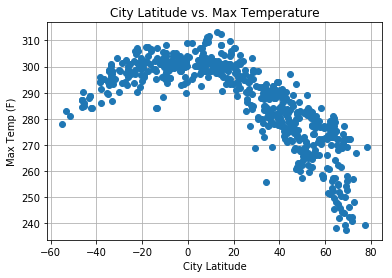

In [17]:
# plot
df.plot(x='Lat', y='Max Temp', style='o',legend=False)

# scatter plot attributes
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel('Max Temp (F)')
plt.title('City Latitude vs. Max Temperature')


#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity')

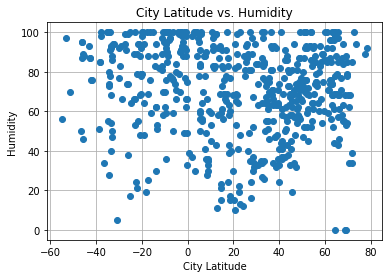

In [18]:
# plot
df.plot(x='Lat', y='Humidity', style='o',legend=False)

# scatter plot attributes
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

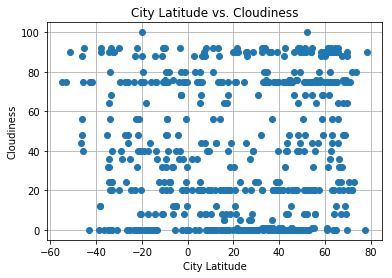

In [19]:
# plot
df.plot(x='Lat', y='Cloudiness', style='o',legend=False)

# scatter plot attributes
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

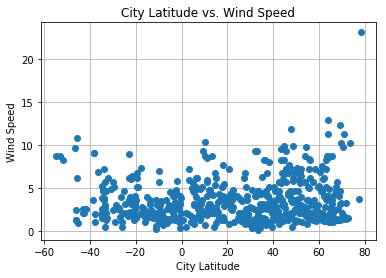

In [20]:
# plot
df.plot(x='Lat', y='Wind Speed', style='o',legend=False)

# scatter plot attributes
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')